<a href="https://colab.research.google.com/github/NearANDfar13/NLP_Winter_2024/blob/main/Final_Notebooks_San_Fran/NA_San_Fran_Ex_Data_DDB_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NearANDfar13/NLP_Winter_2024.git

Cloning into 'NLP_Winter_2024'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 212 (delta 27), reused 2 (delta 2), pack-reused 150 (from 1)
Receiving objects: 100% (212/212), 11.53 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [2]:
#Import the dataset "San Fran Extended Sample"
import pandas as pd

df = pd.read_excel('/content/NLP_Winter_2024/NA_San_Fran_Extended_Sample.xlsx')

#Display DataFrame 'df'
df.head()

,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,3043262-5,19/04/1906,Annener Zeitung,"Annener Zeitung, verbunden mit der Annener Vol...","Annen (Witten), Witten-Annen",NaN,1885-1943,"New=York, 14 Francisco von eine gesucht. Tause...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Westfälische Wilhelms-Universität Münster Univ...
1,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"au- Oakland als Gerücht gemeldet, daß da- amer...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
2,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"ertappt wird, zu erschießen. ir Gf Store (CaUf...",6.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
3,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.,https://www.deutsche-digitale-bibliothek.de/ne...,Badische Landesbibliothek
4,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek


In [3]:
# From Deutsche Digitale Bibliothek Summer School: Digitale Methoden der Zeitungsanalyse
# Link: https://github.com/Deutsche-Digitale-Bibliothek/ddblabs-summer-school-2024/blob/main/003_Worth%C3%A4ufigkeiten_und_Analyse.ipynb
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objects as go

In [4]:
df.to_csv("San_Fran_content2.csv", encoding = "UTF-8")

In [5]:
df = pd.read_csv("San_Fran_content2.csv", encoding = "UTF-8")
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,0,3043262-5,19/04/1906,Annener Zeitung,"Annener Zeitung, verbunden mit der Annener Vol...","Annen (Witten), Witten-Annen",NaN,1885-1943,"New=York, 14 Francisco von eine gesucht. Tause...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Westfälische Wilhelms-Universität Münster Univ...
1,1,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"au- Oakland als Gerücht gemeldet, daß da- amer...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
2,2,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"ertappt wird, zu erschießen. ir Gf Store (CaUf...",6.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
3,3,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.,https://www.deutsche-digitale-bibliothek.de/ne...,Badische Landesbibliothek
4,4,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,"DiSconto-Gesellschast, Berlins., Unter den Lin...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...
306,306,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,freundete und stammverwandte Volk der Vereinig...,3.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...
307,307,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,welches in allerletzter Zeit das uns herzlich ...,11.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...
308,308,2971362-6,25/04/1906,Rhein- und Ruhrzeitung,"Rhein- und Ruhrzeitung, Tageszeitung für das n...","Duisburg, Mülheim an der Ruhr, Ruhrort, Oberha...",täglich,1852-1940,"der zertrümmerten Gebäude, um, sobald Arbeiter...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Universitäts- und Landesbibliothek der Rheinis...


In [6]:
#Most Frequent Words Analysis - Another Method
#Text from DataFrame
content = df['Text'].tolist()
content = [text.lower() for text in content]


In [7]:
#Remove punctuation and Tokenize
listofthings = []
for entry in content:
    for c in string.punctuation:
            entry = entry.replace(c, " ")
    words = entry.split()
    listofthings.extend(words)

In [8]:
#Remove numbers
words = [word for word in listofthings if not word.isdecimal()]

In [9]:
#Import Stopwords
nltk.download('stopwords')
stopger = stopwords.words('german')

#More Stopwords from Deutsche Digitale Bibliothek
newStopwords = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'vgl', '\x97', '•', '■', 'v', 'beim', 'de','—','ge','la','be','en','que','el','ten','ver','gen','sei','nen','del','nen', 'se','schen','un','land','te','ei','aires', 'las', 'los', '«']

stopger.extend(newStopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#Remove Stopwords
tokens_without_sw = [word for word in words if word not in stopger]
#print(tokens_without_sw)

In [11]:
# Count frequency
counts = Counter(tokens_without_sw)

# Top 20 words
top_20_words = counts.most_common(20)
top_150_words = counts.most_common(150)
print(top_20_words)

[('san', 3161), ('francisco', 2359), ('april', 1363), ('erdbeben', 1309), ('stadt', 830), ('feuer', 812), ('uhr', 529), ('wurde', 529), ('zerstört', 523), ('worden', 499), ('gebäude', 453), ('wurden', 434), ('new', 398), ('flammen', 371), ('franzisko', 322), ('millionen', 293), ('ganze', 282), ('teil', 274), ('newyork', 266), ('trümmern', 256)]


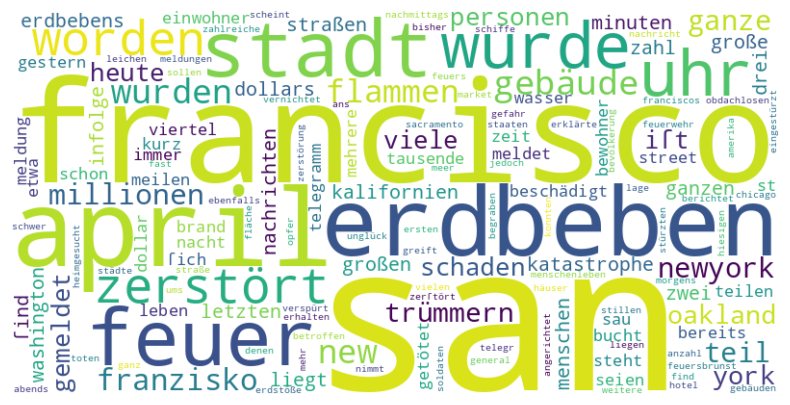

In [12]:
#WordCloud
word_freq_dict = dict(top_150_words)

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

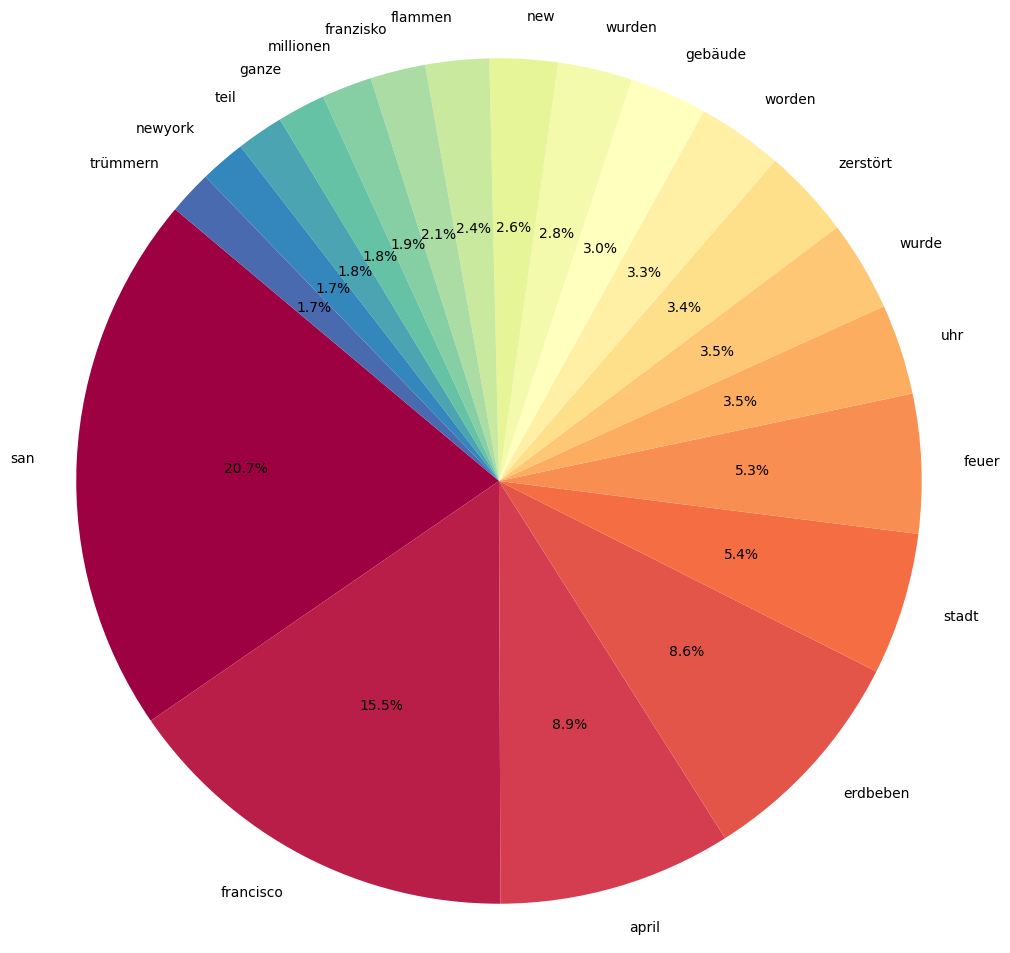

In [23]:
#Pie Chart Word Frequency
def create_circle(word_count):
  labels = [word[0] for word in word_count]
  sizes = [word[1] for word in word_count]
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  plt.figure(figsize=(12, 12))
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.show()

create_circle(top_20_words)

In [24]:
def tokenize(content):

  wordlist = []
  for word in content.split():
    for char in string.punctuation:
      word = word.strip(char)
    wordlist.append(word)

  words = [word for word in wordlist if not word.isdecimal()]
  tokens_without_sw = [word for word in words if word not in stopger]

  return tokens_without_sw

In [25]:
#Most frequent word per day
df['token'] = df['Text'].apply(tokenize)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token
0,0,3043262-5,19/04/1906,Annener Zeitung,"Annener Zeitung, verbunden mit der Annener Vol...","Annen (Witten), Witten-Annen",NaN,1885-1943,"New=York, 14 Francisco von eine gesucht. Tause...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Westfälische Wilhelms-Universität Münster Univ...,"[New=York, Francisco, gesucht, Tausende, ausge..."
1,1,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"au- Oakland als Gerücht gemeldet, daß da- amer...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach,"[au, Oakland, Gerücht, gemeldet, amerikanische..."
2,2,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"ertappt wird, zu erschießen. ir Gf Store (CaUf...",6.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach,"[ertappt, erschießen, ir, Gf, Store, CaUfornte..."
3,3,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.,https://www.deutsche-digitale-bibliothek.de/ne...,Badische Landesbibliothek,"[Die, Marinestationen, Süllen, Ozean, versucht..."
4,4,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,"DiSconto-Gesellschast, Berlins., Unter den Lin...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[DiSconto-Gesellschast, Berlins, Unter, Linde»..."
306,306,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,freundete und stammverwandte Volk der Vereinig...,3.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[freundete, stammverwandte, Volk, Vereinigten,..."
307,307,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,welches in allerletzter Zeit das uns herzlich ...,11.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[allerletzter, Zeit, herzlich, befreundete, st..."
308,308,2971362-6,25/04/1906,Rhein- und Ruhrzeitung,"Rhein- und Ruhrzeitung, Tageszeitung für das n...","Duisburg, Mülheim an der Ruhr, Ruhrort, Oberha...",täglich,1852-1940,"der zertrümmerten Gebäude, um, sobald Arbeiter...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Universitäts- und Landesbibliothek der Rheinis...,"[zertrümmerten, Gebäude, sobald, Arbeiter, vor..."


In [26]:
def counting(tokens):
  counts = Counter(tokens)
  return counts

In [27]:
df['counts'] = df['token'].apply(counting)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token,counts
0,0,3043262-5,19/04/1906,Annener Zeitung,"Annener Zeitung, verbunden mit der Annener Vol...","Annen (Witten), Witten-Annen",NaN,1885-1943,"New=York, 14 Francisco von eine gesucht. Tause...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Westfälische Wilhelms-Universität Münster Univ...,"[New=York, Francisco, gesucht, Tausende, ausge...","{'New=York': 2, 'Francisco': 1, 'gesucht': 1, ..."
1,1,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"au- Oakland als Gerücht gemeldet, daß da- amer...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach,"[au, Oakland, Gerücht, gemeldet, amerikanische...","{'au': 2, 'Oakland': 2, 'Gerücht': 1, 'gemelde..."
2,2,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"ertappt wird, zu erschießen. ir Gf Store (CaUf...",6.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach,"[ertappt, erschießen, ir, Gf, Store, CaUfornte...","{'ertappt': 1, 'erschießen': 1, 'ir': 1, 'Gf':..."
3,3,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.,https://www.deutsche-digitale-bibliothek.de/ne...,Badische Landesbibliothek,"[Die, Marinestationen, Süllen, Ozean, versucht...","{'Die': 16, 'Marinestationen': 1, 'Süllen': 1,..."
4,4,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut...","{'Erdbeben': 5, 'Ealifornien': 1, 'New-Sjork':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,305,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,"DiSconto-Gesellschast, Berlins., Unter den Lin...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[DiSconto-Gesellschast, Berlins, Unter, Linde»...","{'DiSconto-Gesellschast': 1, 'Berlins': 1, 'Un..."
306,306,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,freundete und stammverwandte Volk der Vereinig...,3.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[freundete, stammverwandte, Volk, Vereinigten,...","{'freundete': 1, 'stammverwandte': 1, 'Volk': ..."
307,307,2802868-5,25/04/1906,Norddeutsche allgemeine,Norddeutsche allgemeine Zeitung,Berlin,täglich,1878 - 1918,welches in allerletzter Zeit das uns herzlich ...,11.,https://www.deutsche-digitale-bibliothek.de/ne...,Staatsbibliothek zu Berlin - Preußischer Kultu...,"[allerletzter, Zeit, herzlich, befreundete, st...","{'allerletzter': 1, 'Zeit': 1, 'herzlich': 1, ..."
308,308,2971362-6,25/04/1906,Rhein- und Ruhrzeitung,"Rhein- und Ruhrzeitung, Tageszeitung für das n...","Duisburg, Mülheim an der Ruhr, Ruhrort, Oberha...",täglich,1852-1940,"der zertrümmerten Gebäude, um, sobald Arbeiter...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Universitäts- und Landesbibliothek der Rheinis...,"[zertrümmerten, Gebäude, sobald, Arbeiter, vor...","{'zertrümmerten': 1, 'Gebäude': 1, 'sobald': 1..."


In [41]:
import plotly.express as px

word_to_analyze1 = 'Erdbeben'

#Number of word occurences per day
word_counts1 = df[['Day', 'counts']].copy()
word_counts1['count'] = word_counts1['counts'].apply(lambda x: x.get(word_to_analyze1, 0))
word_counts1 = word_counts1.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig1 = px.line(word_counts1, x='Day', y='count', title=f'Occurence of the Term "{word_to_analyze1}" per Day', height=550)
fig1.update_layout(xaxis_title='Day', yaxis_title='Number of Occurences')
fig1.show()

In [31]:
import plotly.express as px

word_to_analyze2 = 'Feuer'

#Number of word occurences per day
word_counts2 = df[['Day', 'counts']].copy()
word_counts2['count'] = word_counts2['counts'].apply(lambda x: x.get(word_to_analyze2, 0))
word_counts2 = word_counts2.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig2 = px.line(word_counts2, x='Day', y='count', title=f'Occurence of the Term "{word_to_analyze2}" per Day', height=550)
fig2.update_layout(xaxis_title='Day', yaxis_title='Number of Occurences')
fig2.show()

In [34]:
#Compare both
# Liniendiagramm erstellen
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=word_counts1['Day'], y=word_counts1['count'], mode='lines', name=f'Occurence of the Term "{word_to_analyze1}"'))
fig3.add_trace(go.Scatter(x=word_counts2['Day'], y=word_counts2['count'], mode='lines', name=f'Occurence of the Term "{word_to_analyze2}"'))

fig3.update_layout(
    title=f'Occurence of the Terms "{word_to_analyze1}" and "{word_to_analyze2}"',
    xaxis_title='Day',
    yaxis_title='Amount',
    height=550
)

fig3.show()

In [35]:
#Total Entries per day
entry_counts = df.groupby('Day').size().reset_index(name='entry_count')

# Liniendiagramm erstellen
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=word_counts1['Day'], y=word_counts1['count'], mode='lines', name=f'Occurence of the Term "{word_to_analyze1}"'))
fig4.add_trace(go.Scatter(x=word_counts2['Day'], y=word_counts2['count'], mode='lines', name=f'Occurence of the Term "{word_to_analyze2}"'))
fig4.add_trace(go.Scatter(x=entry_counts['Day'], y=entry_counts['entry_count'], mode='lines', name='Total Articles in Corpus'))

fig4.update_layout(
    title=f'Occurence of the Terms "{word_to_analyze1}", "{word_to_analyze2}", and Total Articles in Corpus per Day',
    xaxis_title='Day',
    yaxis_title='Amount',
    height=550
)

fig4.show()